# IRIS DATA VAR. 1

##### Naudojamas modelis, kur viskas automatiškai skaičiuojama (t. y. su funkcija pca iš bibliotekos sklearn)

## Duomenų nuskaitymas ir paruošimas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Naudojant google colab:
# from google.colab import files
# uploaded = files.upload()

# Nuskaitomi duomenys
df = pd.read_csv("iris.data", names=['sepal length','sepal width','petal length','petal width','target'])

Saving iris.data to iris.data


In [3]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']# stulpeliu pavadinimai
x_ro = df.loc[:, features].values # paimti duomenys be klases
y = df.loc[:,['target']].values#  paimta klase
x_ = StandardScaler().fit_transform(x_ro) # duomenys normuoti pagal vidurki ir dispersija


## Modelis

In [4]:
n_comp = 3 # kiek komponentu norime
pca_list = []
for i in range(n_comp): # sukuriamas list objektas su stulpeliu pavadinimais (pca_1 pca_2 pca_3...)
    pca_list.append("pca_" + str(i+1))

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n_comp)
principalComponents = pca.fit_transform(x_)
principalDf = pd.DataFrame(data = principalComponents, columns = pca_list)

In [7]:
principalDf

,pca_1,pca_2,pca_3
0,-2.264542,0.505704,-0.121943
1,-2.086426,-0.655405,-0.227251
2,-2.367950,-0.318477,0.051480
3,-2.304197,-0.575368,0.098860
4,-2.388777,0.674767,0.021428
...,...,...,...
145,1.870522,0.382822,0.254532
146,1.558492,-0.905314,-0.025382
147,1.520845,0.266795,0.179277
148,1.376391,1.016362,0.931405


In [8]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1) # prijungiami klasifikatoriaus reiksmes

In [9]:
finalDf

,pca_1,pca_2,pca_3,target
0,-2.264542,0.505704,-0.121943,Iris-setosa
1,-2.086426,-0.655405,-0.227251,Iris-setosa
2,-2.367950,-0.318477,0.051480,Iris-setosa
3,-2.304197,-0.575368,0.098860,Iris-setosa
4,-2.388777,0.674767,0.021428,Iris-setosa
...,...,...,...,...
145,1.870522,0.382822,0.254532,Iris-virginica
146,1.558492,-0.905314,-0.025382,Iris-virginica
147,1.520845,0.266795,0.179277,Iris-virginica
148,1.376391,1.016362,0.931405,Iris-virginica


In [10]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832])

## Vizualizavimas

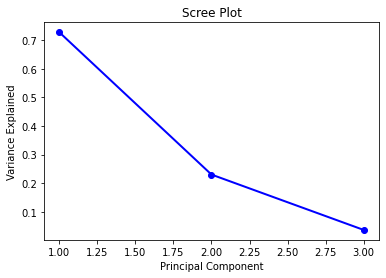

In [11]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

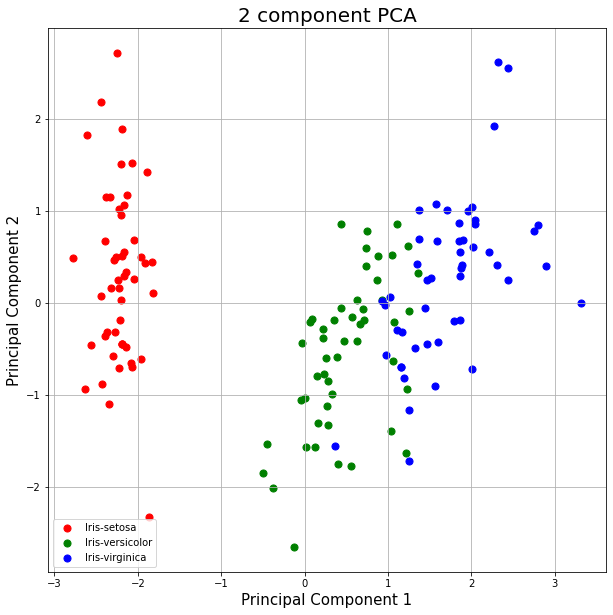

In [12]:

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca_1']
               , finalDf.loc[indicesToKeep, 'pca_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

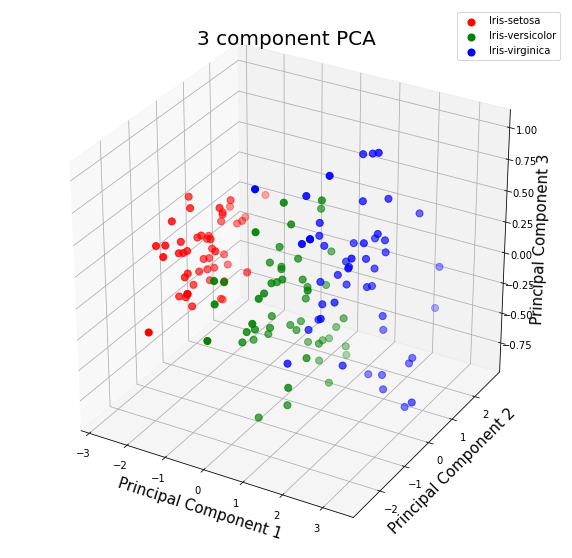

In [13]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection ="3d")
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter3D(finalDf.loc[indicesToKeep, 'pca_1']
               , finalDf.loc[indicesToKeep, 'pca_2']
               , finalDf.loc[indicesToKeep, 'pca_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# IRIS DATA VAR. 2

#### Skaičiuojama beveik viskas rankiniu būdu (kovariacinė matrica, tikrinės reikšmės (eigenvalues), tikriniai vektoriai (eigenvectors)...). 

## Duomenų nuskaitymas ir paruošimas

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("iris.data", names=['sepal length','sepal width','petal length','petal width','target']) # nuskaitomi duomenys
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
label = df['target']
df.drop('target', axis = 1, inplace = True) # istrinamas klasifikatorius is duomenu

x_ro = StandardScaler().fit_transform(df) # duomenys normuoti

In [16]:
x_ro[:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

## Modelis

#### Sudaroma kovariacinė matrica

In [17]:
def get_covariance_matrix(X):
    n_samples = X.shape[0]
    C = np.dot(X.T, X) / (n_samples)
    return C

sample_data = x_ro
covar_matrix = get_covariance_matrix(x_ro)
covar_matrix

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

#### Eigenvalues ir Eigenvectors

Visos eiganval reiksmes:  [0.02060771 0.14735328 0.92122093 2.91081808]


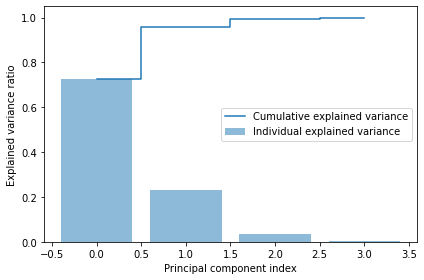

In [18]:
from scipy.linalg import eigh 
values, vectors = eigh(covar_matrix, eigvals=(0,3)) # gaunami visus eigenvalues
print("Visos eiganval reiksmes: ", values)

# skaiciuajamas sum dispersijos dali kiekvinos PC
total_egnvalues = sum(values)
var_exp = [(i/total_egnvalues) for i in sorted(values, reverse=True)]

import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [19]:
vectors

array([[ 0.26199559,  0.72101681, -0.37231836,  0.52237162],
       [-0.12413481, -0.24203288, -0.92555649, -0.26335492],
       [-0.80115427, -0.14089226, -0.02109478,  0.58125401],
       [ 0.52354627, -0.6338014 , -0.06541577,  0.56561105]])

In [20]:
# Surusiuojame pagal didziausias eigenvalues
test = np.array(list(zip(values,vectors.T)))
kazkas = sorted(test, key = lambda x: x[0], reverse=True)
values1, vectors1 = zip(*kazkas)
values1 = np.asarray(values1)
vectors1 = np.asarray(vectors1)

# Gauname transponuota vektoriu matrica

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [21]:
n_comp = 3 # komponenciu kiekis
pca_list = []
for i in range(n_comp):
    pca_list.append("pca_" + str(i+1))

pca_list.append('label')

In [22]:
# Paliekame tik n_comp svarbiausius (didziausia dispersija)
values = values1[:n_comp]
vectors = vectors1[:n_comp]
values

array([2.91081808, 0.92122093, 0.14735328])

In [23]:
print(vectors)

[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]]


In [25]:
# Duomenu pradzia
np.round(sample_data[:5],2)

array([[-0.9 ,  1.03, -1.34, -1.31],
       [-1.14, -0.12, -1.34, -1.31],
       [-1.39,  0.34, -1.4 , -1.31],
       [-1.51,  0.11, -1.28, -1.31],
       [-1.02,  1.26, -1.34, -1.31]])

#### Tranformuojami duomenys

In [45]:
# Transformuojame duomenis pagal musu naujas asis
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
import pandas as pd
new_coordinates = np.vstack((new_coordinates, label)).T

finalDf = pd.DataFrame(data=new_coordinates, columns= pca_list)

In [46]:
finalDf

,pca_1,pca_2,pca_3,label
0,-2.264542,-0.505704,0.121943,Iris-setosa
1,-2.086426,0.655405,0.227251,Iris-setosa
2,-2.36795,0.318477,-0.05148,Iris-setosa
3,-2.304197,0.575368,-0.09886,Iris-setosa
4,-2.388777,-0.674767,-0.021428,Iris-setosa
...,...,...,...,...
145,1.870522,-0.382822,-0.254532,Iris-virginica
146,1.558492,0.905314,0.025382,Iris-virginica
147,1.520845,-0.266795,-0.179277,Iris-virginica
148,1.376391,-1.016362,-0.931405,Iris-virginica


## Vizualizavimas

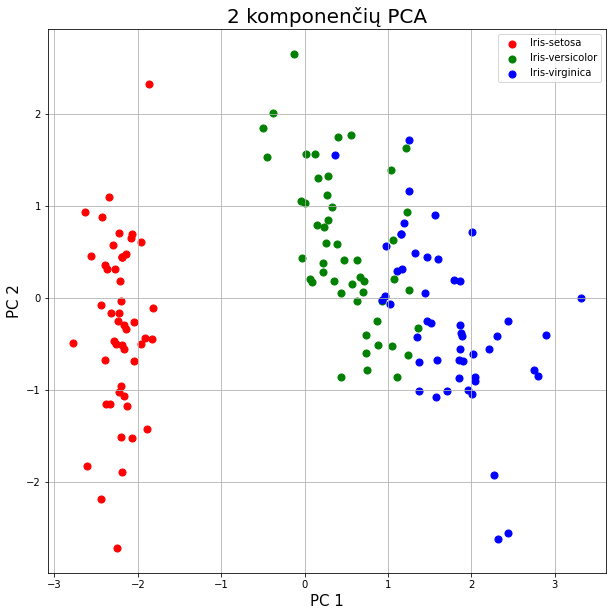

In [44]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('2 komponenčių PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca_1']
               , finalDf.loc[indicesToKeep, 'pca_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

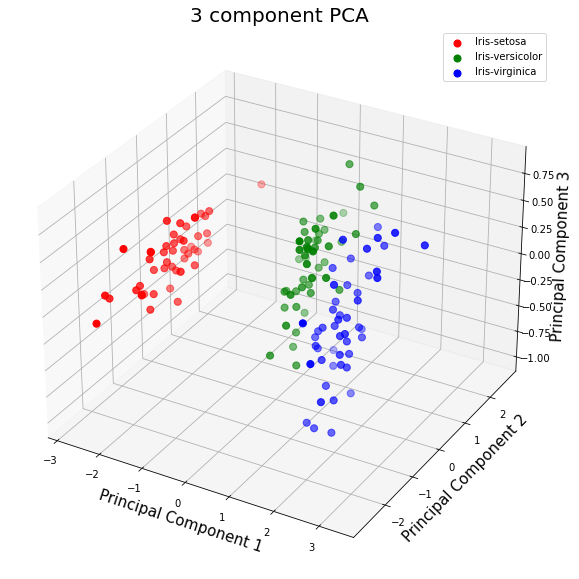

In [ ]:
# 3D (reikia pakeisti virsuje > kur sukuriamas values, vectors ir finalDf)
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection ="3d")
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter3D(finalDf.loc[indicesToKeep, 'pca_1']
               , finalDf.loc[indicesToKeep, 'pca_2']
               , finalDf.loc[indicesToKeep, 'pca_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# MNIST var. 1


#### Skaiciuojama beveik viskas "manually"

## Duomenų nuskaitymas ir paruošimas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Naudojant google colab:
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv('train.csv', nrows = 20000)
print("the shape of data is :", df.shape)
df.head()


the shape of data is : (20000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.groupby('label').apply(lambda x: x.sample(1000, random_state = 1)).reset_index(drop=True)

In [ ]:
# atskiriami labels
label = df['label']
df.drop('label', axis = 1, inplace = True)

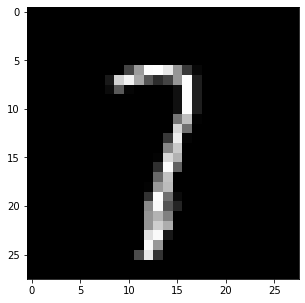

7


In [ ]:
# tiesiog pavaizduoti random mnist objekta 
ind = np.random.randint(0, 10000)
plt.figure(figsize = (20, 5))
grid_data = np.array(df.iloc[ind]).reshape(28,28)
plt.imshow(grid_data, interpolation = None, cmap = 'gray')
plt.show()
print(label[ind])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_ro = scaler.fit_transform(df) # normavimas
x_ro.shape

(10000, 784)

## Modelis

#### Kovariacinė matrica

In [ ]:
def get_covariance_matrix(X):
    n_samples = X.shape[0]
    C = np.dot(X.T, X) / (n_samples)
    return C

sample_data = x_ro
covar_matrix = get_covariance_matrix(x_ro)
covar_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Eigenvalues ir Eigenvector

In [ ]:
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals = (0, 783))# gaunami eigenvalues ir eigenvectors (VISI)
print("Dimensions of Eigen vector:", vectors.shape)

Dimensions of Eigen vector: (784, 784)


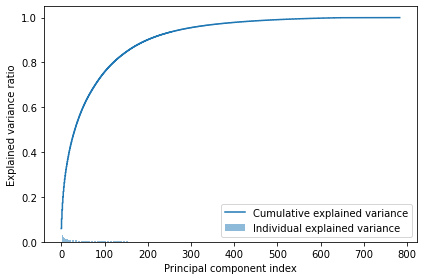

In [ ]:
#Suskaiciuojami dispersijos %
total_egnvalues = sum(values)
var_exp = [(i/total_egnvalues) for i in sorted(values, reverse=True)]


import matplotlib.pyplot as plt
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# Surusiuojame pagal didziausias eigenvalues
test = np.array(list(zip(values,vectors.T)))
kazkas = sorted(test, key = lambda x: x[0], reverse=True)
values1, vectors1 = zip(*kazkas)
values1 = np.asarray(values1)
vectors1 = np.asarray(vectors1)


<ipython-input-33-7989e6485f38>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  test = np.array(list(zip(values,vectors.T)))


In [ ]:
n_comp = 3
pca_list = []
for i in range(n_comp):
    pca_list.append("pca_" + str(i+1))

In [ ]:
pca_list.append('label')

In [ ]:
# Paliekame tik 2 svarbiausius (didziausia dispersija)
values = values1[:n_comp]
vectors = vectors1[:n_comp]
values

array([39.69974161, 29.49098046, 26.98470934])

#### Transformuojami duomenys

In [ ]:
new_coordinates = np.matmul(vectors, sample_data.T) # suskaiciuojami PC
print("vectros:", vectors.shape, "n", "std_df:", sample_data.T.shape, "n", "final_df:", new_coordinates.shape)

vectros: (3, 784) n std_df: (784, 10000) n final_df: (3, 10000)


In [ ]:
final_dfT = np.vstack((new_coordinates, label)).T  # prijungiami labels
finalDf = pd.DataFrame(final_dfT, columns = pca_list)

finalDf

,pca_1,pca_2,pca_3,label
0,1.699337,-4.493013,-2.724630,0.0
1,18.740501,0.005403,-3.543314,0.0
2,12.026060,4.879254,2.192042,0.0
3,17.229800,4.352304,2.848218,0.0
4,20.436675,-9.355035,-10.793962,0.0
...,...,...,...,...
9995,-6.448929,2.913344,-4.545358,9.0
9996,6.855082,13.976492,-4.844368,9.0
9997,-8.584789,-1.211461,-3.363555,9.0
9998,-4.903124,-4.249774,-3.992793,9.0


## Vizualizavimas

D:\JUPYTER\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


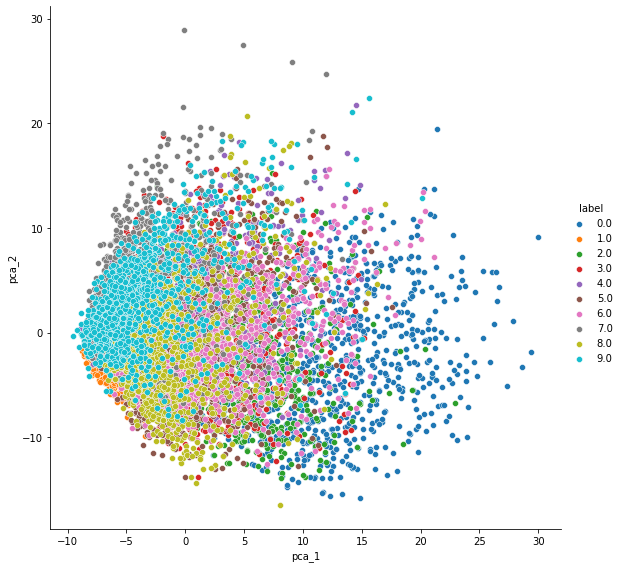

In [ ]:
sns.FacetGrid(finalDf, hue = 'label', size = 8).map(sns.scatterplot, 'pca_1', 'pca_2').add_legend()
plt.show()

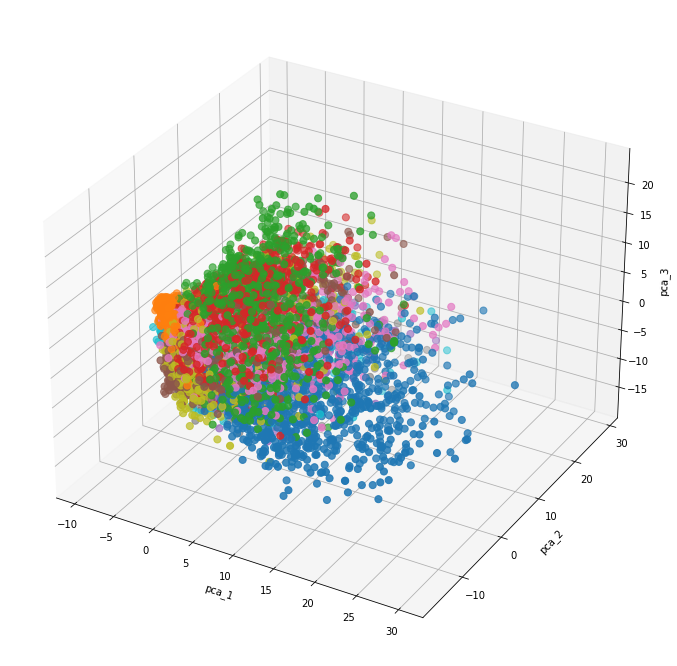

In [ ]:
# 3D (reikia redaguoti virsuje kur uzkomentuoti eilutes)
ax = plt.figure(figsize=(16,12)).gca(projection='3d')
ax.scatter(
    xs=finalDf['pca_1'], 
    ys=finalDf['pca_2'], 
    zs=finalDf['pca_3'], 
    c=finalDf["label"], 
    cmap='tab10',s=50
)
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('pca_3')
plt.show()

# MNIST VAR 2

#### Automatiskai skaiciuojama viskas su modeliu pca

## Duomenų nuskaitymas ir paruošimas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv', nrows = 20000)
print("the shape of data is :", df.shape)
df.head()

the shape of data is : (20000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.groupby('label').apply(lambda x: x.sample(1000, random_state = 1)).reset_index(drop=True) # Paemam kiekvienos klases po 1000 irasu

In [ ]:
# atskiriami labels
label = df['label']
df.drop('label', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_ro = scaler.fit_transform(df) # normavimas
x_ro.shape

(10000, 784)

## Modelis

In [ ]:
n_comp = 3
pca_list = []
for i in range(n_comp):
    pca_list.append("pca_" + str(i+1))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=n_comp) # cia 2D PCA, jei nori 3D tiesiog reikia pakeisti n_components
principalComponents = pca.fit_transform(x_ro)
principalDf = pd.DataFrame(data = principalComponents, columns = pca_list) #2D


In [ ]:
principalDf

,pca_1,pca_2,pca_3
0,1.699284,-4.493292,-2.724163
1,18.740523,0.005587,-3.542809
2,12.025995,4.878853,2.192667
3,17.229788,4.352243,2.848975
4,20.436744,-9.354817,-10.795203
...,...,...,...
9995,-6.448912,2.913405,-4.544707
9996,6.855050,13.976220,-4.846088
9997,-8.584765,-1.211359,-3.364280
9998,-4.903158,-4.249970,-3.993155


In [ ]:
finalDf = pd.concat([principalDf, label], axis = 1)

In [ ]:
finalDf

,pca_1,pca_2,pca_3,label
0,1.699284,-4.493292,-2.724163,0
1,18.740523,0.005587,-3.542809,0
2,12.025995,4.878853,2.192667,0
3,17.229788,4.352243,2.848975,0
4,20.436744,-9.354817,-10.795203,0
...,...,...,...,...
9995,-6.448912,2.913405,-4.544707,9
9996,6.855050,13.976220,-4.846088,9
9997,-8.584765,-1.211359,-3.364280,9
9998,-4.903158,-4.249970,-3.993155,9


In [ ]:
sum(pca.explained_variance_ratio_)

0.14290554372471564

# Vizualizavimas

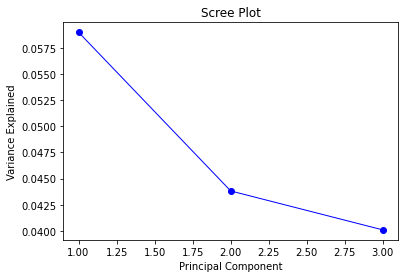

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

D:\JUPYTER\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


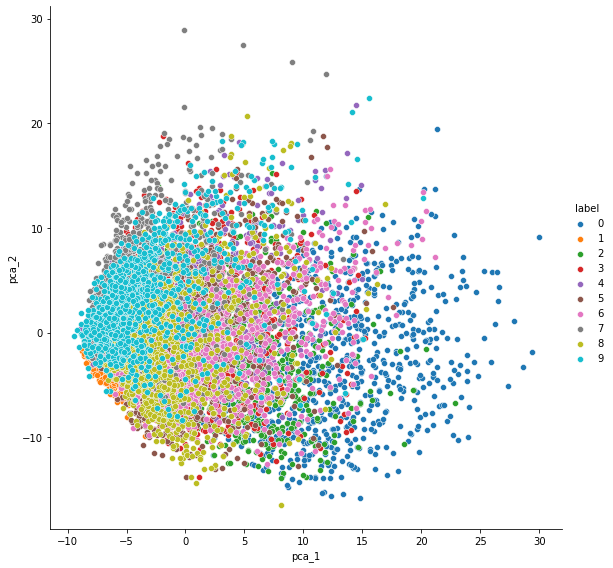

In [ ]:
sns.FacetGrid(finalDf, hue = 'label', size = 8).map(sns.scatterplot, 'pca_1', 'pca_2').add_legend()
plt.show()

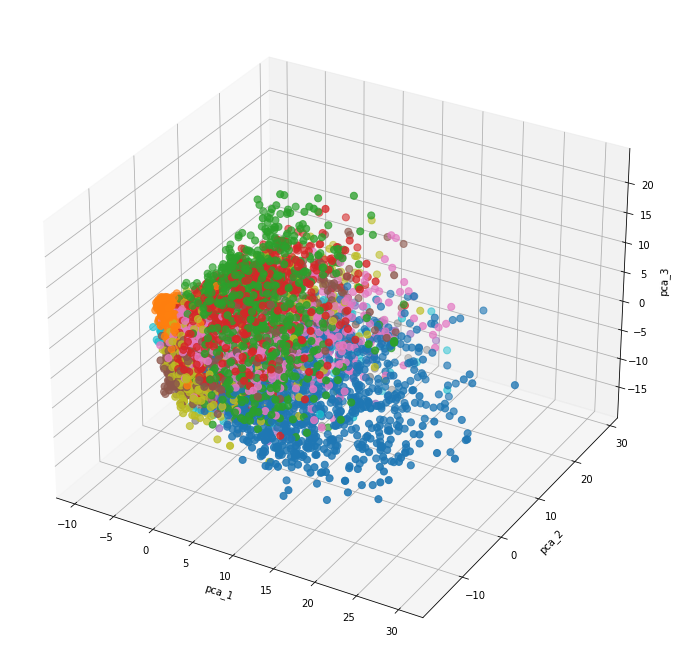

In [ ]:
# 3D
ax = plt.figure(figsize=(16,12)).gca(projection='3d')
ax.scatter(
    xs=finalDf['pca_1'], 
    ys=finalDf['pca_2'], 
    zs=finalDf['pca_3'], 
    c=finalDf["label"], 
    cmap='tab10',s=50
)
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('pca_3')
plt.show()

# INCREMENT PCA

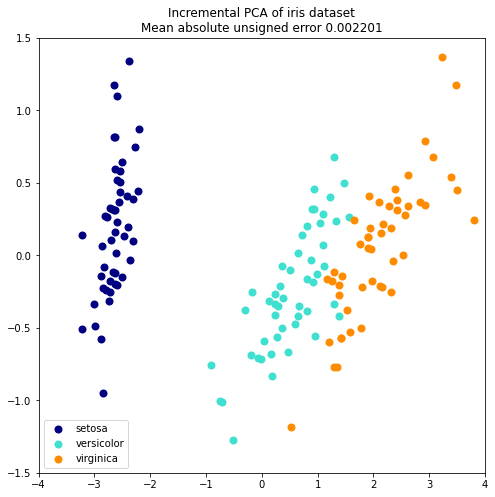

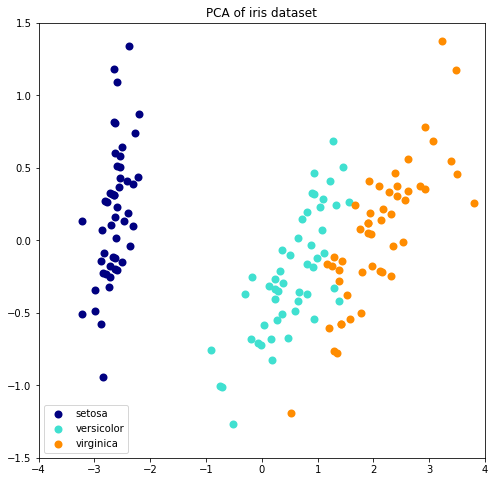

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2 # komponenciu skaicius
ipca = IncrementalPCA(n_components=n_components, batch_size=10) # sukuriamas modelis
X_ipca = ipca.fit_transform(X) 

pca = PCA(n_components=n_components) # paprastas PCA palyginimui
X_pca = pca.fit_transform(X)


# VIZUALIZAVIMAS
colors = ["navy", "turquoise", "darkorange"]
for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

# Kernel PCA

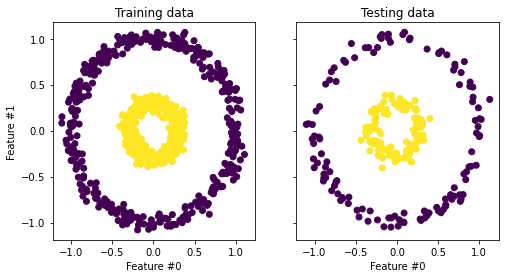

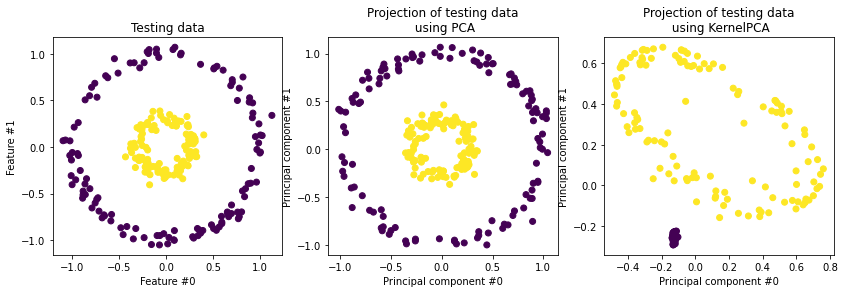

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0) # sukuriami duomenys
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0) # padalinti i train test dalis

import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")


from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2) # sukuriamas  PCA modelis
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
) # KernelPCA 

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)


fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")